In [14]:
import warnings as w
w.simplefilter("ignore")

# 1) Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions

In [7]:
import pandas as pd

# Variables
path = './online_retail_red.txt'
sep=';'
random_state = 42

# Extract
content = open(path, 'r')
transactions = []
for line in content :
    transactions.append(line.strip().split(sep))

print(f"First transaction:\t{transactions[0]}\n\nSecond transaction:\t{transactions[1]}")

First transaction:	['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']

Second transaction:	['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


# 2) Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe 

In [10]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions).astype(int)

df = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3) Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below

In [30]:
from mlxtend.frequent_patterns import apriori
import numpy as np

# We define the limits to the algorithm
min_itemsets = 8
min_items_itemset = 2
support_range = np.arange(1, 0, -0.01)

# Result 
min_support = -1

for support in support_range :
    # We extract the frequent itemsets
    frequent_itemsets = apriori(df, min_support=support, use_colnames = True)

    # We have to see if exixsts at least 'min_itemsets' with at least 'min_items_itemset'
    c = sum([len(itemset) >= min_items_itemset for itemset in frequent_itemsets.itemsets])
    
    # The supports are from the smallest to the greatest, so the first valid is also the smallest valid
    if c >= min_itemsets : 
        min_support = support
        break

# Check if we found the value
if min_support < 0:
    print("No itemset found! Try again with a bigger range!")
else:
    print(f"I've selected min_support = {min_support:.2f}, which produced {len(frequent_itemsets)} itemsets, {c} of which had more than {min_items_itemset} items")

I've selected min_support = 0.03, which produced 148 itemsets, 12 of which had more than 2 items


# 4) Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found

In [32]:
from mlxtend.frequent_patterns import association_rules

# Use best parameter founded before -> frequent_itemsets should already be fitted

# Set the limits
threshold_range = np.arange(1, 0, -0.01)
min_rules = 10

# Result
min_threshold = -1

for threshold in threshold_range :
    rules = association_rules(frequent_itemsets, min_threshold=threshold)
    if len(rules) >= min_rules : 
        min_threshold = threshold
        break


# Check if we found the value
if min_threshold < 0:
    print("No itemset found! Try again with a bigger range!")
else:
    print(f"I've selected min_threshold = {min_threshold:.2f}, which produced {len(rules)} rules")


I've selected min_threshold = 0.61, which produced 11 rules


# 5) Print the first 10 rules found, sorted by descending confidence and support

In [59]:
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=[False, False]).reset_index(drop=True).head(10)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,0.030226,5.287817,0.974669
1,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,0.028441,4.237964,0.969182
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,0.036421,3.793958,0.979865
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,0.036421,3.542939,0.981197
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,0.028159,3.408228,0.971098
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,0.036888,2.762927,0.898156
6,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,0.027283,2.861250,0.948878
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,0.028948,2.653102,0.966406
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,0.026370,2.386273,0.871257
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,0.030226,2.513347,0.987960


# 6) Plot confidence and support for all the sorted rules found

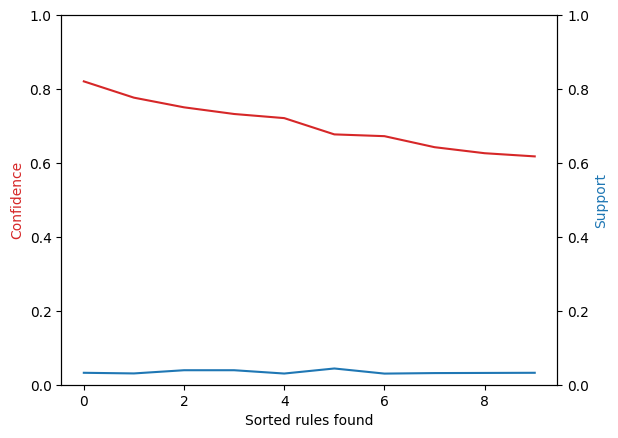

In [50]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

# Confidence
colour = 'tab:red'
ax1.set_xlabel('Sorted rules found')
ax1.set_ylabel('Confidence', color=colour)
ax1.plot(sorted_rules.index, sorted_rules['confidence'], color=colour)
ax1.set_ylim(0,1)

ax2 = ax1.twinx()

# Support
colour = 'tab:blue'
ax2.set_ylabel('Support', color=colour)
ax2.plot(sorted_rules.index, sorted_rules['support'], color=colour)
ax2.set_ylim(0,1)

fig.show()

# 7) Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule

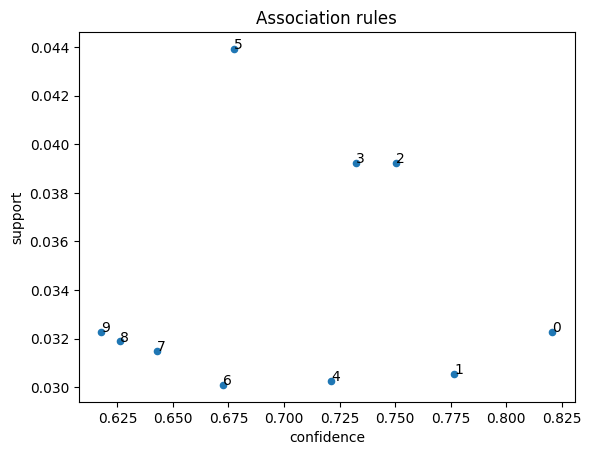

In [60]:
fig = sorted_rules.plot.scatter(x='confidence', y='support', title='Association rules')

for index in range(len(sorted_rules)) :
    fig.annotate(text=index, xy=(sorted_rules['confidence'][index],sorted_rules['support'][index] ))